In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# CARGA DE DATOS

## Los ultimos 3 años

In [2]:
#los datos tomados desde el 1/15 a 7/15
datos1_15_a_7_15=pd.read_csv('../archivoCSV-Properati/properati-AR-2015-07-01-properties-sell-six_months.csv',low_memory=False)

In [3]:
#los datos tomados desde el 6_15 a 12/15
datos6_15_a_12_15=pd.read_csv('../archivoCSV-Properati/properati-AR-2015-12-01-properties-sell-six_months.csv',low_memory=False)

In [4]:
datos1_16=pd.read_csv('../archivoCSV-Properati/properati-AR-2016-01-01-properties-sell.csv',low_memory=False)
datos2_16=pd.read_csv('../archivoCSV-Properati/properati-AR-2016-02-01-properties-sell.csv',low_memory=False)
datos3_16=pd.read_csv('../archivoCSV-Properati/properati-AR-2016-03-01-properties-sell.csv',low_memory=False)
datos4_16=pd.read_csv('../archivoCSV-Properati/properati-AR-2016-04-01-properties-sell.csv',low_memory=False)
datos5_16=pd.read_csv('../archivoCSV-Properati/properati-AR-2016-05-01-properties-sell.csv',low_memory=False)
datos6_16=pd.read_csv('../archivoCSV-Properati/properati-AR-2016-06-01-properties-sell.csv',low_memory=False)

In [5]:
datos7_16=pd.read_csv('../archivoCSV-Properati/properati-AR-2016-07-01-properties-sell.csv',low_memory=False)
datos8_16=pd.read_csv('../archivoCSV-Properati/properati-AR-2016-08-01-properties-sell.csv',low_memory=False)
datos9_16=pd.read_csv('../archivoCSV-Properati/properati-AR-2016-09-01-properties-sell.csv',low_memory=False)
datos10_16=pd.read_csv('../archivoCSV-Properati/properati-AR-2016-10-01-properties-sell.csv',low_memory=False)
datos11_16=pd.read_csv('../archivoCSV-Properati/properati-AR-2016-11-01-properties-sell.csv',low_memory=False)
datos12_16=pd.read_csv('../archivoCSV-Properati/properati-AR-2016-12-01-properties-sell.csv',low_memory=False)

In [6]:
#los datos tomados desde el 1/17 a 7/17
datos1_17_a_7_17=pd.read_csv('../archivoCSV-Properati/properati-AR-2017-07-01-properties-sell-six_months.csv',low_memory=False)

In [7]:
datos8_17=pd.read_csv('../archivoCSV-Properati/properati-AR-2017-08-01-properties-sell.csv',low_memory=False)

# FILTRAMOS LOS DATOS POR CABA Y GRAN BUENOS AIRES

In [8]:
datos1_15_a_7_15_CABA=datos1_15_a_7_15.loc[datos1_15_a_7_15.state_name.str.contains('Capital Federal'),:]
datos1_15_a_7_15_GBA=datos1_15_a_7_15.loc[datos1_15_a_7_15.state_name.str.contains('Bs.As.'),:]
datos1_15_a_7_15_CABA_GBA=pd.concat([datos1_15_a_7_15_CABA,datos1_15_a_7_15_GBA])

datos6_15_a_12_15_CABA=datos6_15_a_12_15.loc[datos6_15_a_12_15.state_name.str.contains('Capital Federal'),:]
datos6_15_a_12_15_GBA=datos6_15_a_12_15.loc[datos6_15_a_12_15.state_name.str.contains('Bs.As.'),:]
datos6_15_a_12_15_CABA_GBA=pd.concat([datos6_15_a_12_15_CABA,datos6_15_a_12_15_GBA])

In [9]:
datos1_16_CABA=datos1_16.loc[datos1_16.state_name.str.contains('Capital Federal'),:]
datos1_16_GBA=datos1_16.loc[datos1_16.state_name.str.contains('Bs.As.'),:]
datos1_16_CABA_GBA=pd.concat([datos1_16_CABA,datos1_16_GBA])

datos2_16_CABA=datos2_16.loc[datos2_16.state_name.str.contains('Capital Federal'),:]
datos2_16_GBA=datos2_16.loc[datos2_16.state_name.str.contains('Bs.As.'),:]
datos2_16_CABA_GBA=pd.concat([datos2_16_CABA,datos2_16_GBA])

datos3_16_CABA=datos3_16.loc[datos3_16.state_name.str.contains('Capital Federal'),:]
datos3_16_GBA=datos3_16.loc[datos3_16.state_name.str.contains('Bs.As.'),:]
datos3_16_CABA_GBA=pd.concat([datos3_16_CABA,datos3_16_GBA])

datos4_16_CABA=datos4_16.loc[datos4_16.state_name.str.contains('Capital Federal'),:]
datos4_16_GBA=datos4_16.loc[datos4_16.state_name.str.contains('Bs.As.'),:]
datos4_16_CABA_GBA=pd.concat([datos4_16_CABA,datos4_16_GBA])

datos5_16_CABA=datos5_16.loc[datos5_16.state_name.str.contains('Capital Federal'),:]
datos5_16_GBA=datos5_16.loc[datos5_16.state_name.str.contains('Bs.As.'),:]
datos5_16_CABA_GBA=pd.concat([datos5_16_CABA,datos5_16_GBA])

datos6_16_CABA=datos6_16.loc[datos6_16.state_name.str.contains('Capital Federal'),:]
datos6_16_GBA=datos6_16.loc[datos6_16.state_name.str.contains('Bs.As.'),:]
datos6_16_CABA_GBA=pd.concat([datos6_16_CABA,datos6_16_GBA])

datos7_16_CABA=datos7_16.loc[datos7_16.state_name.str.contains('Capital Federal'),:]
datos7_16_GBA=datos7_16.loc[datos7_16.state_name.str.contains('Bs.As.'),:]
datos7_16_CABA_GBA=pd.concat([datos7_16_CABA,datos7_16_GBA])

datos8_16_CABA=datos8_16.loc[datos8_16.state_name.str.contains('Capital Federal'),:]
datos8_16_GBA=datos8_16.loc[datos8_16.state_name.str.contains('Bs.As.'),:]
datos8_16_CABA_GBA=pd.concat([datos8_16_CABA,datos8_16_GBA])

datos9_16_CABA=datos9_16.loc[datos9_16.state_name.str.contains('Capital Federal'),:]
datos9_16_GBA=datos9_16.loc[datos9_16.state_name.str.contains('Bs.As.'),:]
datos9_16_CABA_GBA=pd.concat([datos9_16_CABA,datos9_16_GBA])

datos10_16_CABA=datos10_16.loc[datos10_16.state_name.str.contains('Capital Federal'),:]
datos10_16_GBA=datos10_16.loc[datos10_16.state_name.str.contains('Bs.As.'),:]
datos10_16_CABA_GBA=pd.concat([datos10_16_CABA,datos10_16_GBA])

datos11_16_CABA=datos11_16.loc[datos11_16.state_name.str.contains('Capital Federal'),:]
datos11_16_GBA=datos11_16.loc[datos11_16.state_name.str.contains('Bs.As.'),:]
datos11_16_CABA_GBA=pd.concat([datos11_16_CABA,datos11_16_GBA])

datos12_16_CABA=datos12_16.loc[datos12_16.state_name.str.contains('Capital Federal'),:]
datos12_16_GBA=datos12_16.loc[datos12_16.state_name.str.contains('Bs.As.'),:]
datos12_16_CABA_GBA=pd.concat([datos12_16_CABA,datos12_16_GBA])

In [10]:
datos1_17_a_7_17_CABA=datos1_17_a_7_17.loc[datos1_17_a_7_17.state_name.str.contains('Capital Federal'),:]
datos1_17_a_7_17_GBA=datos1_17_a_7_17.loc[datos1_17_a_7_17.state_name.str.contains('Bs.As.'),:]
datos1_17_a_7_17_CABA_GBA=pd.concat([datos1_17_a_7_17_CABA,datos1_17_a_7_17_GBA])

datos8_17_CABA=datos8_17.loc[datos8_17.state_name.str.contains('Capital Federal'),:]
datos8_17_GBA=datos8_17.loc[datos8_17.state_name.str.contains('Bs.As.'),:]
datos8_17_CABA_GBA=pd.concat([datos8_17_CABA,datos8_17_GBA])

# ELIMINAMOS COLUMNAS QUE NO APORTAN AL ESTUDIO
operation, place_with_parent_names, country_name, geonames_id, lat-lon, price, currency, price_aprox_local_currency, price_per_m2, properati_url, title, image_thumbnail

In [11]:
datos1_15_a_7_15_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos6_15_a_12_15_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name","geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)

In [12]:
datos1_16_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos2_16_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos3_16_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos4_16_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos5_16_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos6_16_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos7_16_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos8_16_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos9_16_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos10_16_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos11_16_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos12_16_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)

In [13]:
datos1_17_a_7_17_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)
datos8_17_CABA_GBA.drop(["operation", "place_with_parent_names", "country_name", "geonames_id", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_per_m2", "properati_url", "title", "image_thumbnail"],axis=1,inplace=True)

# FILTRAMOS POR PRECIOS NAN'S YA QUE CONSIDERAMOS QUE NO APORTAN AL ESTUDIO DE DATOS:

In [14]:
datos1_15_a_7_15_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos6_15_a_12_15_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)

In [15]:
datos1_16_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos2_16_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos3_16_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos4_16_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos5_16_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos6_16_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos7_16_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos8_16_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos9_16_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos10_16_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos11_16_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos12_16_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos1_17_a_7_17_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)
datos8_17_CABA_GBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2'],inplace=True)

In [16]:
publicaciones2015=pd.merge(datos1_15_a_7_15_CABA_GBA,datos6_15_a_12_15_CABA_GBA,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])

In [17]:
publicaciones2015['Year_publicacion']=2015

In [18]:
publicaciones2016=pd.merge(datos1_16_CABA_GBA,datos2_16_CABA_GBA,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])
publicaciones2016=pd.merge(datos3_16_CABA_GBA,publicaciones2016,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])
publicaciones2016=pd.merge(datos4_16_CABA_GBA,publicaciones2016,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])
publicaciones2016=pd.merge(datos5_16_CABA_GBA,publicaciones2016,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])
publicaciones2016=pd.merge(datos6_16_CABA_GBA,publicaciones2016,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])
publicaciones2016=pd.merge(datos7_16_CABA_GBA,publicaciones2016,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])
publicaciones2016=pd.merge(datos8_16_CABA_GBA,publicaciones2016,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])
publicaciones2016=pd.merge(datos9_16_CABA_GBA,publicaciones2016,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])
publicaciones2016=pd.merge(datos10_16_CABA_GBA,publicaciones2016,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])
publicaciones2016=pd.merge(datos11_16_CABA_GBA,publicaciones2016,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])
publicaciones2016=pd.merge(datos12_16_CABA_GBA,publicaciones2016,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])

In [19]:
publicaciones2016['Year_publicacion']=2016

In [20]:
publicaciones2017=pd.merge(datos1_17_a_7_17_CABA_GBA,datos8_17_CABA_GBA,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description"])

In [21]:
publicaciones2017['Year_publicacion']=2017

# observando las publicaciones pudimos observar que existen registros cuya fecha de creacion son mayores a las fechas de publicacion lo que para nosotros son absurdas

In [22]:
publicaciones2015['created_on']=pd.to_datetime(publicaciones2015['created_on'],errors='coerce')
publicaciones2015['Year']=publicaciones2015['created_on'].map(lambda x:x.year)
publicaciones2015['Year']=publicaciones2015['Year'].fillna(0).astype(int)
publicaciones2015['Month']=publicaciones2015['created_on'].map(lambda y:y.month)
publicaciones2015['Month']=publicaciones2015['Month'].fillna(0).astype(int)

In [23]:
publicaciones2016['created_on']=pd.to_datetime(publicaciones2016['created_on'],errors='coerce')
publicaciones2016['Year']=publicaciones2016['created_on'].map(lambda x:x.year)
publicaciones2016['Year']=publicaciones2016['Year'].fillna(0).astype(int)
publicaciones2016['Month']=publicaciones2016['created_on'].map(lambda y:y.month)
publicaciones2016['Month']=publicaciones2016['Month'].fillna(0).astype(int)

In [24]:
publicaciones2017['created_on']=pd.to_datetime(publicaciones2017['created_on'],errors='coerce')
publicaciones2017['Year']=publicaciones2017['created_on'].map(lambda x:x.year)
publicaciones2017['Year']=publicaciones2017['Year'].fillna(0).astype(int)
publicaciones2017['Month']=publicaciones2017['created_on'].map(lambda y:y.month)
publicaciones2017['Month']=publicaciones2017['Month'].fillna(0).astype(int)

In [25]:
publicaciones2015=publicaciones2015[publicaciones2015['Year']<=2015]
publicaciones2016=publicaciones2016[publicaciones2016['Year']<=2016]
publicaciones2017=publicaciones2017[publicaciones2017['Year']<=2017]

In [26]:
publicacion_Total=pd.merge(publicaciones2015,publicaciones2016,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description","Year","Month","Year_publicacion"])

In [27]:
publicacion_Total=pd.merge(publicacion_Total,publicaciones2017,how='outer',on=["id","created_on","property_type",
                                                                                "place_name","lat","lon","state_name",
                                                                                "price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2",
                                                                                "floor","rooms","expenses","description","Year","Month","Year_publicacion"])
publicacion_Total[:5]

,id,created_on,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,description,Year_publicacion,Year,Month
0,ac3eca87a9d49d338688953b2ad41c5f0554b355,2015-01-06,apartment,Palermo,Capital Federal,-34.581691,-58.443318,112000.0,41.0,36.0,2731.707317,NaN,NaN,NaN,CODIGO: -0004 ubicado en: Dorrego 1711 - Publ...,2015,2015,1
1,4c84c51d291e98dcc2b07407d22092b827c47842,2015-01-06,apartment,Palermo,Capital Federal,-34.581691,-58.443318,114000.0,41.0,36.0,2780.487805,NaN,NaN,NaN,CODIGO: -0005 ubicado en: Dorrego 1711 - Publ...,2015,2015,1
2,7cec992b012ba547d7f5c10768b4cc69d4eddfc6,2015-01-06,apartment,Palermo,Capital Federal,-34.581691,-58.443318,116000.0,41.0,36.0,2829.268293,NaN,NaN,NaN,CODIGO: -0006 ubicado en: Dorrego 1711 - Publ...,2015,2015,1
3,594e773dd2f83141d93ef450931791292ea7cd5d,2015-01-06,apartment,Palermo,Capital Federal,-34.581691,-58.443318,118000.0,41.0,36.0,2878.048780,NaN,NaN,NaN,CODIGO: -0007 ubicado en: Dorrego 1711 - Publ...,2015,2015,1
4,0170264e64799ab4e63baad0b34ded4887171163,2015-01-06,apartment,Palermo,Capital Federal,-34.581691,-58.443318,120000.0,41.0,36.0,2926.829268,NaN,NaN,NaN,CODIGO: -0008 ubicado en: Dorrego 1711 - Publ...,2015,2015,1


# Análisis de Expensas


### 1) Filtro los datos por Cap Fed y GBA

In [190]:
DatosGBA = publicacion_Total.loc[publicacion_Total.state_name.str.contains('Bs.As.'),:]
DatosCapFed = publicacion_Total.loc[publicacion_Total.state_name.str.contains('Capital Federal'),:]

### 2) Verificamos con cuantos datos totales ( que pagan y no pagan expensas) contamos.

In [198]:
PropiedadesTotalesCapFed=DatosCapFed[['property_type','place_name']]

In [199]:
PropiedadesTotalesGBA=DatosGBA[['property_type','place_name']]

In [201]:
PropiedadesTotalesCapFed.dropna(subset=['property_type','place_name'],inplace=True)
PropiedadesTotalesGBA.dropna(subset=['property_type','place_name'],inplace=True)

/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [355]:
PropiedadesTotalesCapFed=PropiedadesTotalesCapFed[PropiedadesTotalesCapFed['place_name']!='Capital Federal']

In [356]:
PropiedadesTotalesGBA=PropiedadesTotalesGBA[PropiedadesTotalesGBA['place_name']!='Bs.As. G.B.A. Zona Oeste']

In [354]:
PropiedadesTotalesCapFed.loc[:, 'property_type'].value_counts() 

apartment    57249
PH            4364
house         3526
store         2769
Name: property_type, dtype: int64

In [357]:
PropiedadesTotalesGBA.loc[:, 'property_type'].value_counts() 

house        61782
apartment    40981
PH            6822
store         2430
Name: property_type, dtype: int64

### 3) Filtramos las 5 columnas; ya que para nuestro análisis de expensas será en base a las zonas, el tipo de propiedad y la superficie total por m2.

Nota: Consideramos superficie total por m2; ya que el fín de esto es encontrar alguna anomalía del valor de las expensas respecto a los datos que nos aporta superficie total m2.

In [358]:
ExpensasCapFed=DatosCapFed[['property_type','place_name','surface_total_in_m2',
                             'price_usd_per_m2','expenses']]

In [359]:
ExpensasGBA=DatosGBA[['property_type','place_name','state_name','surface_total_in_m2',
                             'price_usd_per_m2','expenses']]

### 4) Limpiamos los Nan's que exista en la columna expenses, place_name y  property_type; ya que las expensas será evaluado según el tipo de propiedad y barrio

In [360]:
ExpensasCapFed.dropna(subset=['expenses','place_name'],inplace=True)
ExpensasGBA.dropna(subset=['expenses','place_name'],inplace=True)

/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Obs: Durante el barrido de limpieza hemos observado que dentro de los Datos Cap Fed, se encontraba como barrio Cap Fed, esto lo hemos considerado un absurdo ya que no existe dicho barrio. A continuación se deja como muestra el barrio Cap Fed 

In [361]:
grouped = ExpensasCapFed.loc[:,['place_name','property_type']].groupby('place_name')
grouped.get_group('Capital Federal')

,place_name,property_type
1260,Capital Federal,apartment
2395,Capital Federal,store
2743,Capital Federal,PH
2888,Capital Federal,apartment
2957,Capital Federal,apartment
2958,Capital Federal,apartment
3321,Capital Federal,apartment
22051,Capital Federal,apartment
22055,Capital Federal,apartment
22056,Capital Federal,apartment


In [362]:
ExpensasCapFed=ExpensasCapFed[ExpensasCapFed['place_name']!='Capital Federal']

Obs: Durante el barrido de limpieza hemos observado que dentro de los Datos de GBA, se encontraba como barrio GBA Zona Oeste, esto lo hemos considerado un absurdo ya que no existe dicho barrio. A continuación se deja como muestra el barrio

In [363]:
grouped2 = ExpensasGBA.loc[:,['place_name','property_type']].groupby('place_name')
grouped2.get_group('Bs.As. G.B.A. Zona Oeste')

,place_name,property_type
104330,Bs.As. G.B.A. Zona Oeste,apartment
104357,Bs.As. G.B.A. Zona Oeste,apartment
104363,Bs.As. G.B.A. Zona Oeste,apartment
104364,Bs.As. G.B.A. Zona Oeste,apartment
104370,Bs.As. G.B.A. Zona Oeste,apartment
104371,Bs.As. G.B.A. Zona Oeste,apartment
104372,Bs.As. G.B.A. Zona Oeste,apartment
104379,Bs.As. G.B.A. Zona Oeste,apartment
104383,Bs.As. G.B.A. Zona Oeste,apartment
104387,Bs.As. G.B.A. Zona Oeste,apartment


In [364]:
ExpensasGBA=ExpensasGBA[ExpensasGBA['place_name']!='Bs.As. G.B.A. Zona Oeste']

### 5) Verificamos cuantos datos se han limpiado

In [365]:
ExpensasGBA.loc[:,['property_type','expenses']].groupby(['property_type'])\
                .agg(['count']) 

,expenses
,count
property_type,
PH,393
apartment,6712
house,2785
store,203


In [366]:
ExpensasCapFed.loc[:,['property_type','expenses']].groupby(['property_type'])\
                .agg(['count'])  

,expenses
,count
property_type,
PH,629
apartment,17891
house,66
store,321


### 6) Ordenamos en forma descendentes las expensas con el fín de analizar si existen datos exageradamente fuera de los parámetros normales

#### 6.1) Análizamos las propiedades del tipo 'house' en Cap Fed
Consideramos:

1) las expensas que se encuentre en el rago de 100 < expensas < 10000

2) Para las expensas <= 100 lo consideramos un absurdo 

3) Para las expensas > 10000; ya que el único valor que nos figura como 159000 no es lógico ni con su superficie total y es un valor absolutamente exhorbitante en pagar una expensa

In [367]:
ExpensasDelTipoCasaCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='house',:].sort_values('expenses',ascending=False)
ExpensasDelTipoCasaCapFed

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
88937,house,Villa Pueyrredón,17.0,9352.941176,159000.0
135077,house,Recoleta,105.0,4047.619048,10000.0
40682,house,Palermo Hollywood,76.0,128.290395,7897.0
92984,house,Almagro,800.0,661.250000,6100.0
125679,house,Balvanera,800.0,611.250000,6100.0
31649,house,Balvanera,800.0,611.250000,6100.0
32826,house,San Telmo,130.0,1576.923077,5000.0
126432,house,San Telmo,130.0,1576.923077,5000.0
64265,house,Palermo,54.0,2444.444444,3300.0
63052,house,Palermo,143.0,2440.559441,3200.0


#### 6.2) Análizamos las propiedades del tipo 'house' en GBA
     
  Consideraciones:

1) En la actualidad al existir casas en barrios cerrados estas tienen gastos en común y cabe la posiblidad de pagar  expensas.

2) Tomamos el sgte rango como válido, 100<expensas<40000. 

3) El criterio que se uso para eliminar los datos mayores a 40000 es por que representa el 0.18% y que esas expensas nos parecio exagerado a diferencia de otras


In [368]:
ExpensasDelTipoCasaGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='house',:].sort_values('expenses',ascending=False)
ExpensasDelTipoCasaGBA

,property_type,place_name,state_name,surface_total_in_m2,price_usd_per_m2,expenses
66671,house,Vicente López,Bs.As. G.B.A. Zona Norte,160.0,937.500000,150000.0
154363,house,El Palomar,Bs.As. G.B.A. Zona Oeste,124.0,1193.548387,140000.0
61149,house,El Palomar,Bs.As. G.B.A. Zona Oeste,124.0,1193.548387,140000.0
52307,house,Caseros,Bs.As. G.B.A. Zona Oeste,170.0,752.941176,128000.0
163107,house,Caseros,Bs.As. G.B.A. Zona Oeste,170.0,752.941176,128000.0
181009,house,Tigre,Bs.As. G.B.A. Zona Norte,180.0,1416.666667,40000.0
107176,house,Los Lagartos Country Club,Bs.As. G.B.A. Zona Norte,750.0,1466.666667,35000.0
175393,house,Pilar,Bs.As. G.B.A. Zona Norte,750.0,1466.666667,35000.0
20143,house,San Vicente,Bs.As. G.B.A. Zona Sur,500.0,660.000000,29000.0
177637,house,San Isidro,Bs.As. G.B.A. Zona Norte,650.0,3307.692308,28000.0


#### 6.3) Análizamos las propiedades del tipo 'PH' en Cap Fed
Consideraciones:

1)En la actualidad, existen PH que contratan en forma particular la limpieza de sus pasillos y arreglos como un 
gasto en comùn entre todos los propietarios y es considerado como parte del gasto de una expensa

2)Vamos a considerar en limpiar los datos de expensas menores a 100 

In [369]:
ExpensasDelTipoPHCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='PH',:].sort_values('expenses',ascending=False)
ExpensasDelTipoPHCapFed

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
72474,PH,Once,250.0,1160.000000,5500.0
124270,PH,Once,250.0,1160.000000,5500.0
21273,PH,Once,250.0,1160.000000,5500.0
146279,PH,Belgrano,110.0,2318.181818,4000.0
99604,PH,Belgrano,61.0,2934.426230,3500.0
102957,PH,Balvanera,183.0,1174.863388,3400.0
94961,PH,Balvanera,162.0,1327.160494,3400.0
133091,PH,Balvanera,162.0,1327.160494,3400.0
60516,PH,Palermo,105.0,1614.285714,3060.0
60517,PH,Colegiales,105.0,1614.285714,3060.0


#### 6.4) Análizamos las propiedades del tipo 'PH' en GBA
Consideraciones:

1)Tomaremos las expensas que se encuentre en el rango de 100 < expensas <= 60000 

2)Para el caso de las expensas>6000 estas representan el 1.02% y hemos detectado datos absurdo como: 

*En el caso de la propiedad de San Martin en Zona Norte tiene una superficie menor a otra propiedad ubicada también en en Zona Norte y el pago de expensas es 10 veces menor

*Con respecto a la expensas de 110000 nos parecio un valor totalmente exagerado sumado a la zona en la que se encuentra.

In [370]:
ExpensasDelTipoPHGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='PH',:].sort_values('expenses',ascending=False)
ExpensasDelTipoPHGBA

,property_type,place_name,state_name,surface_total_in_m2,price_usd_per_m2,expenses
161146,PH,Ituzaingó,Bs.As. G.B.A. Zona Oeste,210.0,571.428571,110000.0
49658,PH,Ituzaingó,Bs.As. G.B.A. Zona Oeste,210.0,571.428571,110000.0
155727,PH,San Martín,Bs.As. G.B.A. Zona Norte,100.0,650.000000,65000.0
42546,PH,San Martín,Bs.As. G.B.A. Zona Norte,100.0,650.000000,65000.0
169018,PH,Olivos,Bs.As. G.B.A. Zona Norte,163.0,2024.539877,6000.0
105398,PH,Tigre,Bs.As. G.B.A. Zona Norte,85.0,1294.117647,5500.0
65332,PH,Tigre,Bs.As. G.B.A. Zona Norte,85.0,1294.117647,5500.0
166672,PH,Quilmes,Bs.As. G.B.A. Zona Sur,78.0,2051.282051,3500.0
117607,PH,Quilmes,Bs.As. G.B.A. Zona Sur,78.0,2051.282051,3500.0
57341,PH,Pilar,Bs.As. G.B.A. Zona Norte,95.0,1336.842105,3500.0


#### 6.5) Análizamos las propiedades del tipo Store en Cap Fed
Consideraciones:

1)Vamos a considerar en limpiar las expensas<100

In [371]:
ExpensasDelTipoStoreCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='store',:].sort_values('expenses',ascending=False)
ExpensasDelTipoStoreCapFed

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
131084,store,Recoleta,277.0,7220.216606,18069.0
95472,store,Recoleta,277.0,7220.216606,18069.0
140868,store,Paternal,330.0,606.060606,17500.0
30609,store,San Nicolás,500.0,1180.000000,17000.0
140839,store,Retiro,334.0,568.862275,15000.0
31181,store,Palermo Hollywood,280.0,2678.571429,13400.0
144807,store,Recoleta,157.0,2229.299363,12800.0
37012,store,Paternal,330.0,757.575758,11500.0
137164,store,Nuñez,100.0,10000.000000,10000.0
100710,store,Nuñez,100.0,10000.000000,10000.0


####  6.6) Análizamos las propiedades del tipo Store en GBA
Consideraciones:

1)En la actualidad, existen Tiendas que se encuentran en la PB de un Edificio y ser parte de un mismo consorcio; por ende es posible que este no este exento en pagar expensas.

2)Vamos a considerar en limpiar las expensas < 100

In [372]:
ExpensasDelTipoStoreGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='store',:].sort_values('expenses',ascending=False)
ExpensasDelTipoStoreGBA

,property_type,place_name,state_name,surface_total_in_m2,price_usd_per_m2,expenses
174579,store,Lanús,Bs.As. G.B.A. Zona Sur,467.0,813.704497,11000.0
174927,store,Lomas de Zamora,Bs.As. G.B.A. Zona Sur,60.0,13000.000000,9000.0
113145,store,Pilar,Bs.As. G.B.A. Zona Norte,132.0,909.090909,7100.0
174524,store,Pilar,Bs.As. G.B.A. Zona Norte,132.0,1666.666667,7100.0
182332,store,Tigre,Bs.As. G.B.A. Zona Norte,36.0,3611.111111,5000.0
180089,store,Tigre,Bs.As. G.B.A. Zona Norte,36.0,4305.555556,4700.0
179820,store,Castelar,Bs.As. G.B.A. Zona Oeste,4377.0,1142.334933,4200.0
181077,store,General Pacheco,Bs.As. G.B.A. Zona Norte,37.0,3243.243243,4000.0
179296,store,Tigre,Bs.As. G.B.A. Zona Norte,35.0,3714.285714,3900.0
149976,store,Pilar,Bs.As. G.B.A. Zona Norte,72.0,1069.444444,3500.0


####  6.7) Análizamos las propiedades del tipo Apartment en Cap Fed
Consideraciones:

1)Tomamos el rango de expensas que se encuentre 100<=expensas<=40000
Respecto a las expensas>40000 lo hemos descartado ya que los datos que analizamos nos parece un absurdo; a modo de ejm: 

Una propiedad de Villa Luro de superficie total de 46 m2; pague esa cifra de expensas.

A su vez; consideramos que esos datos mayores a 40000 solo representa el 0.0008% 


In [373]:
ExpensasDelTipoDepCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='apartment',:].sort_values('expenses',ascending=False)
ExpensasDelTipoDepCapFed

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
102721,apartment,Villa Luro,46.0,3043.478261,10001500.0
102722,apartment,Villa Luro,49.0,3265.306122,10001500.0
128008,apartment,Belgrano,198.0,3787.878788,865906.0
124272,apartment,Villa Crespo,39.0,2871.794872,180000.0
92469,apartment,Recoleta,244.0,3258.196721,180000.0
37840,apartment,Almagro,81.0,2098.765432,160000.0
40512,apartment,Monserrat,57.0,1710.526316,97500.0
144796,apartment,Flores,202.0,1633.663366,70000.0
101759,apartment,Palermo,83.0,3409.638554,70000.0
99707,apartment,Belgrano,92.0,3586.956522,54240.0


#### 6.8) Análizamos las propiedades del tipo Apartment en GBA
Consideraciones:

1)Limpiaremos las expensas<100, por considerarlo un absurdo

2)Limpiaremos las expensas>35000, ya que representa el 0.24%

In [374]:
ExpensasDelTipoDepGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='apartment',:].sort_values('expenses',ascending=False)
ExpensasDelTipoDepGBA

,property_type,place_name,state_name,surface_total_in_m2,price_usd_per_m2,expenses
158497,apartment,Moreno,Bs.As. G.B.A. Zona Oeste,1100.0,227.272727,250000.0
46212,apartment,Moreno,Bs.As. G.B.A. Zona Oeste,1100.0,227.272727,250000.0
116471,apartment,Moreno,Bs.As. G.B.A. Zona Oeste,450.0,39.078533,220000.0
166430,apartment,Moreno,Bs.As. G.B.A. Zona Oeste,450.0,36.142800,220000.0
156809,apartment,Olivos,Bs.As. G.B.A. Zona Norte,118.0,1838.983051,217000.0
44059,apartment,Olivos,Bs.As. G.B.A. Zona Norte,118.0,1838.983051,217000.0
43598,apartment,San Martín,Bs.As. G.B.A. Zona Norte,58.0,3000.000000,174000.0
156440,apartment,San Martín,Bs.As. G.B.A. Zona Norte,58.0,3000.000000,174000.0
156441,apartment,San Martín,Bs.As. G.B.A. Zona Norte,58.0,2913.793103,174000.0
43599,apartment,San Martín,Bs.As. G.B.A. Zona Norte,58.0,2913.793103,174000.0


### 7) Filtramos los datos, según lo analizado en el punto 6

In [375]:
grupoDepCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='apartment',:].loc[(ExpensasCapFed.expenses<=40000)&(ExpensasCapFed.expenses>=100),:]\
        .sort_values('expenses',ascending=False)      

In [376]:
grupoTiendasCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='store',:].loc[ExpensasCapFed.expenses>=100,:]\
        .sort_values('expenses',ascending=False)    

In [377]:
grupoPHCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='PH',:].loc[ExpensasCapFed.expenses>=100,:]\
        .sort_values('expenses',ascending=False)

In [378]:
grupoCasasCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='house',:].loc[(ExpensasCapFed.expenses<=10000)&(ExpensasCapFed.expenses>=100),:]\
        .sort_values('expenses',ascending=False)

In [379]:
grupoDepGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='apartment',:].loc[(ExpensasGBA.expenses<=35000)&(ExpensasGBA.expenses>=100),:]\
        .sort_values('expenses',ascending=False)   

In [380]:
grupoCasasGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='house',:].loc[ (ExpensasGBA.expenses<=40000)&(ExpensasGBA.expenses>=100),:]\
        .sort_values('expenses',ascending=False) 

In [381]:
grupoTiendasGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='store',:].loc[ExpensasGBA.expenses>=100,:]\
        .sort_values('expenses',ascending=False)

In [382]:
grupoPHGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='PH',:].loc[ (ExpensasGBA.expenses<=6000)&(ExpensasGBA.expenses>=100),:]\
        .sort_values('expenses',ascending=False)

## 8) Resultados y gráficos

### 8.1) Cap Fed: Histogramas según la cantidad y promedio de propiedades en cada barrio

In [383]:
Dpto=grupoDepCapFed.loc[:,['place_name','expenses']].groupby(['place_name'])\
    .agg([np.mean,np.size])
DptoCapFed = Dpto.loc[Dpto[('expenses','size')]>100,:].sort_values(('expenses','mean'), ascending=False)    
DptoCapFed.head(10)

expenses        
                      mean    size
place_name                        
Puerto Madero  8168.490566   159.0
Palermo Chico  7917.400000   120.0
Las Cañitas    5482.803150   127.0
Belgrano       5305.591059  2125.0
Recoleta       5198.114596   829.0
Retiro         4518.473684   190.0
Palermo        4387.837986  2006.0
Barrio Norte   4253.255117  1368.0
Nuñez          3663.285124   484.0
San Nicolás    2772.705521   163.0

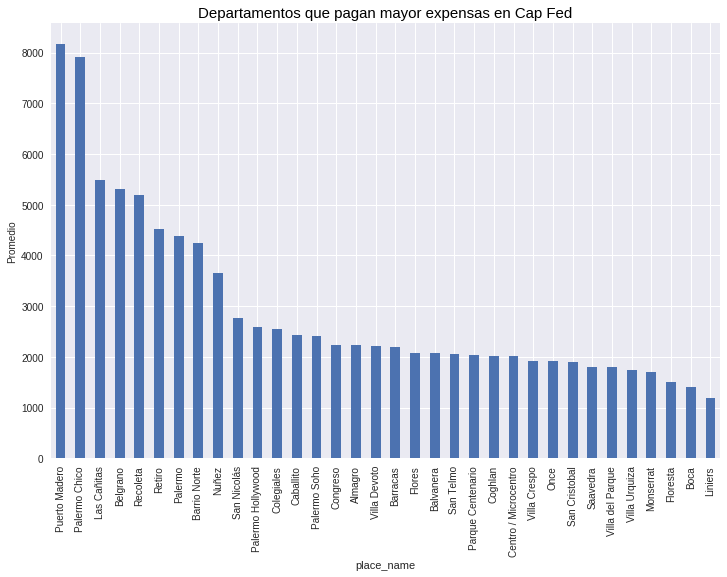

In [384]:
f = plt.figure()

plt.title ('Departamentos que pagan mayor expensas en Cap Fed',color='black', fontsize=15)
plt.ylabel('Promedio', fontsize=10)

DptoCapFed_hist = DptoCapFed.loc[:,('expenses','mean')]
DptoCapFed_hist.plot(kind='bar',rot=90,figsize=(12,8));

In [385]:
Casas=grupoCasasCapFed.loc[:,['place_name','expenses']].groupby(['place_name'])\
    .agg([np.mean,np.size])
CasasCapFed = Casas.loc[Casas[('expenses','size')]>1,:].sort_values(('expenses','mean'), ascending=False)    
CasasCapFed.head(10)

expenses      
                          mean  size
place_name                          
Recoleta           6600.000000   2.0
Balvanera          6100.000000   2.0
San Telmo          5000.000000   2.0
Almagro            3033.333333   3.0
Palermo Hollywood  2799.625000   8.0
Palermo            2403.100000  10.0
Villa Devoto       2250.000000   3.0
Villa Pueyrredón   2250.000000   3.0
Nuñez              1850.000000   2.0
Belgrano           1713.333333   3.0

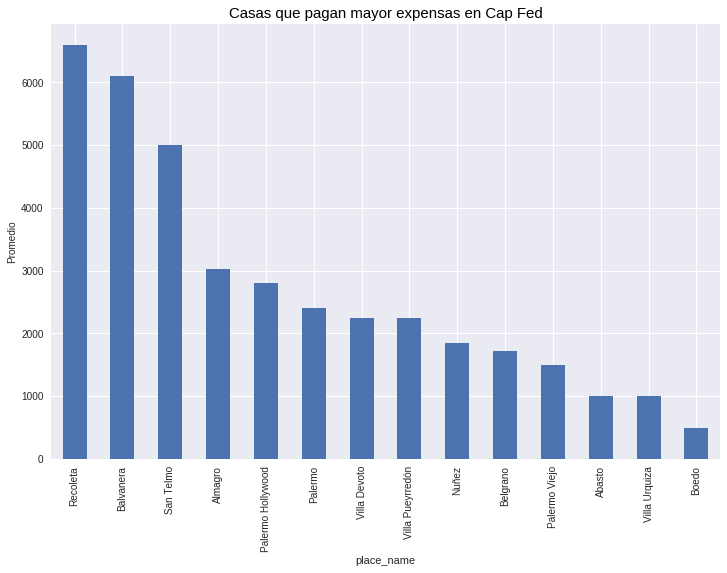

In [386]:
f = plt.figure()

plt.title ('Casas que pagan mayor expensas en Cap Fed',color='black', fontsize=15)
plt.ylabel('Promedio', fontsize=10)

CasasCapFed_hist = CasasCapFed.loc[:,('expenses','mean')]
CasasCapFed_hist.plot(kind='bar',rot=90,figsize=(12,8));

In [387]:
Tiendas=grupoTiendasCapFed.loc[:,['place_name','expenses']].groupby(['place_name'])\
    .agg([np.mean,np.size])
TiendasCapFed = Tiendas.loc[Tiendas[('expenses','size')]>5,:].sort_values(('expenses','mean'), ascending=False)    
TiendasCapFed.head(10)

expenses      
                     mean  size
place_name                     
Retiro        6135.428571   7.0
Recoleta      4254.680000  25.0
Tribunales    3566.666667   6.0
Nuñez         3550.909091  11.0
Barrio Norte  3193.600000  45.0
San Nicolás   3172.370370  27.0
Balvanera     2701.222222   9.0
San Telmo     2621.857143  21.0
Monserrat     2066.666667   9.0
Congreso      2042.857143   7.0

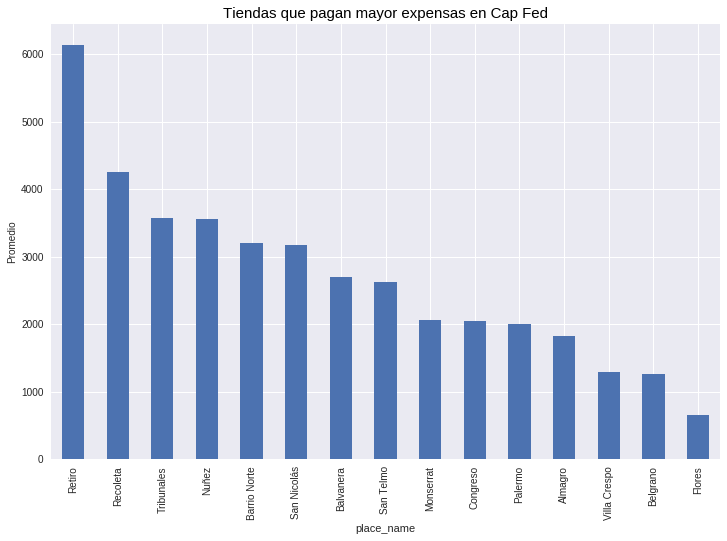

In [388]:
f = plt.figure()

plt.title ('Tiendas que pagan mayor expensas en Cap Fed',color='black', fontsize=15)
plt.ylabel('Promedio', fontsize=10)

TiendasCapFed_hist = TiendasCapFed.loc[:,('expenses','mean')]
TiendasCapFed_hist.plot(kind='bar',rot=90,figsize=(12,8));

In [389]:
PH=grupoPHCapFed.loc[:,['place_name','expenses']].groupby(['place_name'])\
    .agg([np.mean,np.size])
PHCapFed = PH.loc[PH[('expenses','size')]>15,:].sort_values(('expenses','mean'), ascending=False)    
PHCapFed.head(10)

expenses      
                      mean  size
place_name                      
Belgrano       1321.052632  19.0
Balvanera      1089.000000  26.0
Palermo        1020.080000  25.0
Palermo Soho   1005.555556  18.0
San Cristobal   847.200000  20.0
Caballito       783.894737  19.0
Flores          772.708333  24.0
Villa Crespo    686.000000  57.0
Villa Urquiza   682.000000  28.0
Almagro         646.745455  55.0

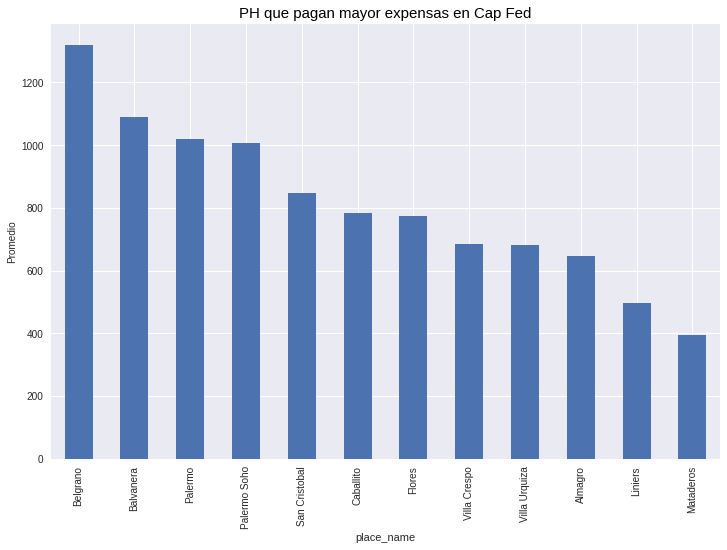

In [390]:
f = plt.figure()

plt.title ('PH que pagan mayor expensas en Cap Fed',color='black', fontsize=15)
plt.ylabel('Promedio', fontsize=10)

PHCapFed_hist = PHCapFed.loc[:,('expenses','mean')]
PHCapFed_hist.plot(kind='bar',rot=90,figsize=(12,8)); 

### 8.2) GBA: Histogramas según la cantidad y promedio de propiedades en cada barrio

In [391]:
Dpto=grupoDepGBA.loc[:,['place_name','state_name','expenses']].groupby(['place_name','state_name'])\
    .agg([np.mean,np.size])
DptoGBA = Dpto.loc[Dpto[('expenses','size')]>10,:].sort_values(('expenses','mean'), ascending=False)    
DptoGBA.head(10)

expenses       
                                                   mean   size
place_name        state_name                                  
La Lucila         Bs.As. G.B.A. Zona Norte  7060.714286   84.0
Villa Rosa        Bs.As. G.B.A. Zona Norte  4078.947368   19.0
Nordelta          Bs.As. G.B.A. Zona Norte  4065.818774  767.0
Barrio El Golf    Bs.As. G.B.A. Zona Norte  3215.789474   19.0
Acassuso          Bs.As. G.B.A. Zona Norte  3195.818182   44.0
Rincón de Milberg Bs.As. G.B.A. Zona Norte  3128.076923   26.0
Vicente López     Bs.As. G.B.A. Zona Norte  3118.624204  157.0
BarrioPortezuelo  Bs.As. G.B.A. Zona Norte  3117.857143   14.0
Martínez          Bs.As. G.B.A. Zona Norte  2850.000000   68.0
Olivos            Bs.As. G.B.A. Zona Norte  2665.404858  247.0

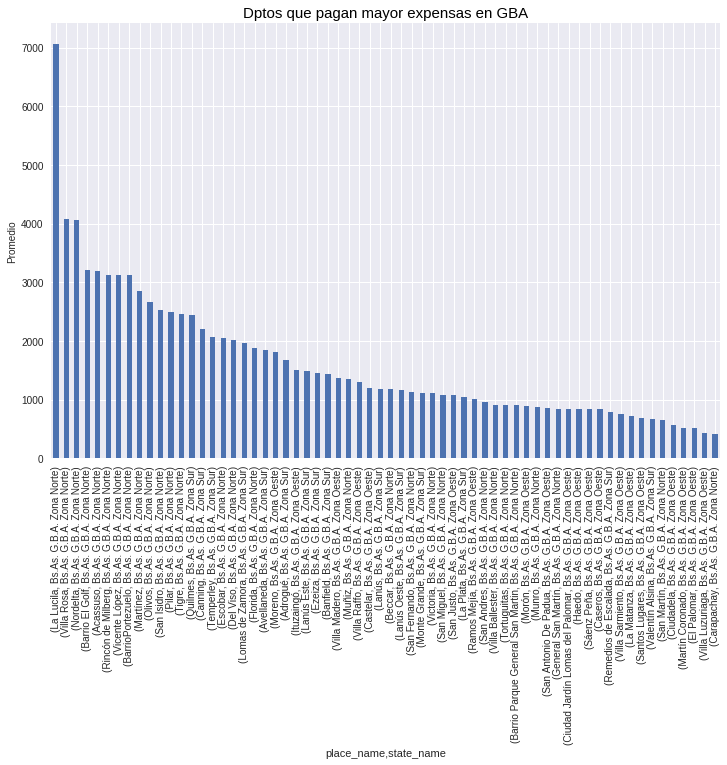

In [392]:
f = plt.figure()

plt.title ('Dptos que pagan mayor expensas en GBA',color='black', fontsize=15)
plt.ylabel('Promedio', fontsize=10)

DptoGBA_hist = DptoGBA.loc[:,('expenses','mean')]
DptoGBA_hist.plot(kind='bar',rot=90,figsize=(12,8)); 

In [393]:
Casas=grupoCasasGBA.loc[:,['place_name','state_name','expenses']].groupby(['place_name','state_name'])\
    .agg([np.mean,np.size])
CasasGBA = Casas.loc[Casas[('expenses','size')]>10,:].sort_values(('expenses','mean'), ascending=False)    
CasasGBA.head(10)

expenses       
                                                                  mean   size
place_name                      state_name                                   
Highland Park Country Club      Bs.As. G.B.A. Zona Norte  11591.666667   12.0
Country Club Aranjuez           Bs.As. G.B.A. Zona Norte  10709.090909   11.0
Malvinas Argentinas             Bs.As. G.B.A. Zona Norte   9125.454545   55.0
San Isidro                      Bs.As. G.B.A. Zona Norte   8036.000000   15.0
San Vicente                     Bs.As. G.B.A. Zona Sur     7248.275862   29.0
La Lomada de Pilar              Bs.As. G.B.A. Zona Norte   7154.545455   11.0
Barrio Privado "Ayres de Pilar" Bs.As. G.B.A. Zona Norte   7153.333333   15.0
Moreno                          Bs.As. G.B.A. Zona Oeste   6517.037037   27.0
Rincón de Milberg               Bs.As. G.B.A. Zona Norte   6487.500000   20.0
Nordelta                        Bs.As. G.B.A. Zona Norte   6466.505882  340.0

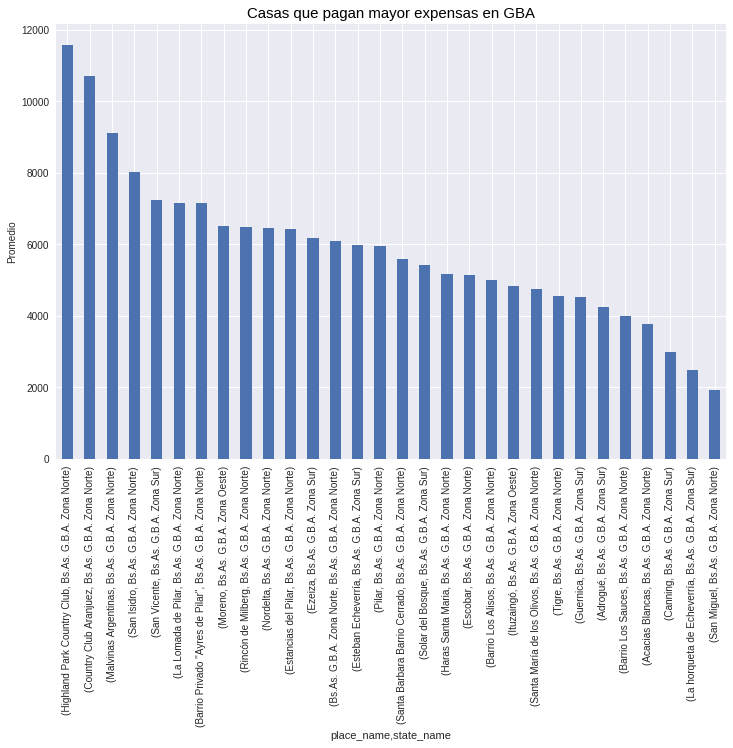

In [394]:
f = plt.figure()

plt.title ('Casas que pagan mayor expensas en GBA',color='black', fontsize=15)
plt.ylabel('Promedio', fontsize=10)

CasasGBA_hist = CasasGBA.loc[:,('expenses','mean')]
CasasGBA_hist.plot(kind='bar',rot=90,figsize=(12,8)); 

In [403]:
Tiendas=grupoTiendasGBA.loc[:,['place_name','state_name','expenses']].groupby(['place_name','state_name'])\
    .agg([np.mean,np.size])
TiendasGBA = Tiendas.loc[Tiendas[('expenses','size')]>1,:].sort_values(('expenses','mean'), ascending=False)    
TiendasGBA.head(10)

expenses      
                                                 mean  size
place_name      state_name                                 
Tigre           Bs.As. G.B.A. Zona Norte  3716.666667   6.0
Nordelta        Bs.As. G.B.A. Zona Norte  3100.000000   2.0
Lomas de Zamora Bs.As. G.B.A. Zona Sur    3054.000000   5.0
Pilar           Bs.As. G.B.A. Zona Norte  2793.153846  13.0
General Pacheco Bs.As. G.B.A. Zona Norte  2555.500000   2.0
Escobar         Bs.As. G.B.A. Zona Norte  1800.000000   4.0
Villa Rosa      Bs.As. G.B.A. Zona Norte  1703.666667   6.0
La Plata        Bs.As. G.B.A. Zona Sur    1650.000000   4.0
Olivos          Bs.As. G.B.A. Zona Norte  1488.800000   5.0
Wilde           Bs.As. G.B.A. Zona Sur    1111.000000   3.0

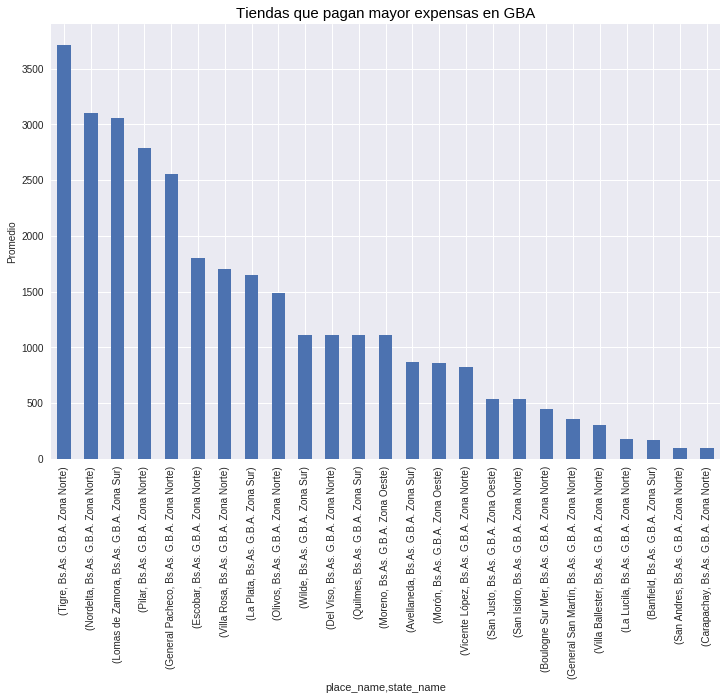

In [404]:
f = plt.figure()

plt.title ('Tiendas que pagan mayor expensas en GBA',color='black', fontsize=15)
plt.ylabel('Promedio', fontsize=10)

TiendasGBA_hist = TiendasGBA.loc[:,('expenses','mean')]
TiendasGBA_hist.plot(kind='bar',rot=90,figsize=(12,8)); 

In [396]:
PH=grupoPHGBA.loc[:,['place_name','state_name','expenses']].groupby(['place_name','state_name'])\
    .agg([np.mean,np.size])
PHGBA = PH.loc[PH[('expenses','size')]>5,:].sort_values(('expenses','mean'), ascending=False)    
PHGBA.head(10)


expenses      
                                                     mean  size
place_name          state_name                                 
Florida             Bs.As. G.B.A. Zona Norte  1778.571429   7.0
Quilmes             Bs.As. G.B.A. Zona Sur    1530.000000  11.0
Olivos              Bs.As. G.B.A. Zona Norte  1360.777778   9.0
Malvinas Argentinas Bs.As. G.B.A. Zona Norte  1032.000000  10.0
Bernal              Bs.As. G.B.A. Zona Sur     650.000000   6.0
Villa Ballester     Bs.As. G.B.A. Zona Norte   650.000000  10.0
Ramos Mejía         Bs.As. G.B.A. Zona Oeste   504.642857  28.0
La Plata            Bs.As. G.B.A. Zona Sur     402.000000  10.0
Morón               Bs.As. G.B.A. Zona Oeste   355.000000   7.0
General San Martín  Bs.As. G.B.A. Zona Norte   159.302326  43.0

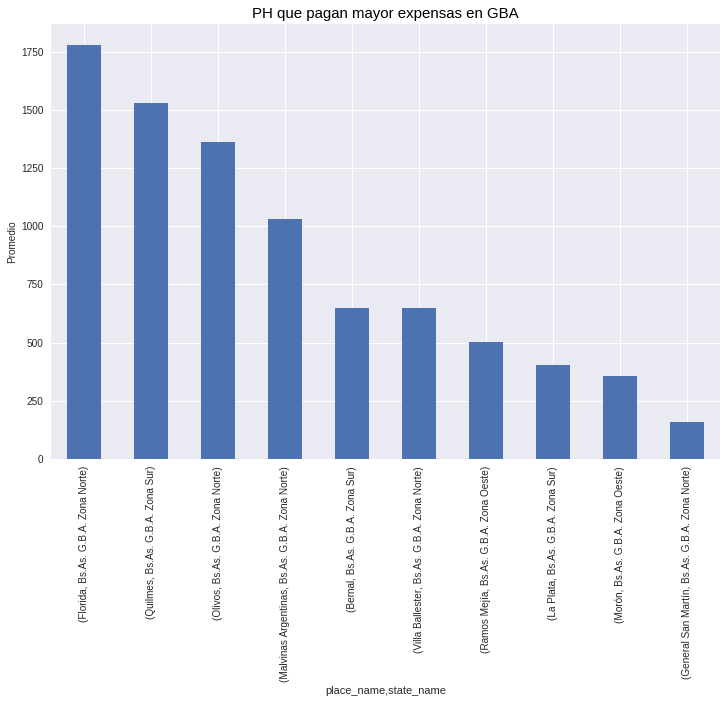

In [402]:
f = plt.figure()

plt.title ('PH que pagan mayor expensas en GBA',color='black', fontsize=15)
plt.ylabel('Promedio', fontsize=10)

PHGBA_hist = PHGBA.loc[:,('expenses','mean')]
PHGBA_hist.plot(kind='bar',rot=90,figsize=(12,8)); 